In [30]:
%cd "/content/drive/MyDrive/AI_Workshops/Final Assesment/"
%pwd

import pandas as pd
import numpy as np

/content/drive/MyDrive/AI_Workshops/Final Assesment


In [31]:
# Gender: Male or Female (encoded as Gender_Male, 1 if Male, 0 if Female)
# CAEC: Eating between meals (Sometimes, Frequently, Always, No)
# CALC: Alcohol consumption (Never, Sometimes, Frequently)
# MTRANS: Mode of transportation (Public, Walking, Bike, Motorbike, Automobile)

# Binary Features (Yes/No, Converted to 0/1)
# family_history_with_overweight: Does the person have a family history of obesity? (1 = Yes, 0 = No)
# FAVC: Do they frequently eat high-calorie food? (1 = Yes, 0 = No)
# SMOKE: Do they smoke? (1 = Yes, 0 = No)
# SCC: Do they monitor their daily calorie intake? (1 = Yes, 0 = No)

# Continuous Features
# Age: Age of the person
# Height: Height in meters
# Weight: Weight in kg
# NCP: Number of main meals per day
# CH2O: How much water they drink daily
# FAF: Physical activity frequency (hours per week)

# Integer Features
# FCVC: Frequency of vegetable consumption (1 = Low, 2 = Medium, 3 = High)
# TUE: Time spent using tech devices (hours per day)

# Target Variable (New Binary Column)
# is_obese: 1 if Overweight/Obese, 0 if Normal/Underweight

dataset = pd.read_csv('Datasets/ObesityDataset_estimation_02.csv')
dataset.head(5)
dataset.tail(5)
dataset



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [32]:
# binary_columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
# for col in binary_columns:
#     dataset[col] = dataset[col].map({'yes': 1, 'no': 0})

# # Simplify categorical columns into binary categories for better accuracy
# # MTRANS: 1 if Walking, 0 for everything else
# dataset['MTRANS'] = dataset['MTRANS'].apply(lambda x: 1 if x == 'Walking' else 0)

# # CALC: 1 if Sometimes or Frequently, 0 if No
# dataset['CALC'] = dataset['CALC'].apply(lambda x: 1 if x in ['Sometimes', 'Frequently'] else 0)

# # CAEC: 1 if Sometimes, Frequently, or Always, 0 if No
# dataset['CAEC'] = dataset['CAEC'].apply(lambda x: 1 if x in ['Sometimes', 'Frequently', 'Always'] else 0)

# # 1 For Male 0 FOr Female
# # dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})

# # Drop original target column and create binary 'is_obese' column
dataset['is_obese'] = dataset['NObeyesdad'].apply(lambda x: 1 if 'Obesity' in x else 0)
dataset.drop(columns=['NObeyesdad'], inplace=True)
dataset


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,is_obese
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,0
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,0
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,0
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,0
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,1
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,1
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,1
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,1


In [33]:
# Binary Tree Like Structure:

class Node():
  def __init__(self,threshold=None,left=None,right=None,information_gain=None,value=None,feature_index=None,):

    self.threshold = threshold # Threshold to split upon
    self.left = left #Nodes that hold True to the threshold will stay here
    self.right = right #Nodes that hold False to the threshold will stay here
    self.info_gain = information_gain
    self.feature_index = feature_index

    # If the node is a leaf node this shall hold the final prediction value
    self.value = value

class DecisionTreeClassifier():

  def predict(self, X):
      predictions = [self._predict_sample(sample, self.root) for sample in X.values]
      return np.array(predictions)

  def _predict_sample(self, sample, node):
      if node.value is not None:  # If it's a leaf node
          return node.value
      feature_value = sample[node.feature_index]
      if feature_value <= node.threshold:
          return self._predict_sample(sample, node.left)
      else:
          return self._predict_sample(sample, node.right)

  def __init__(self,max_depth=2,min_samples_split=2):

    # Root of the tree
    self.root = None

    # Stopping Conditions:
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth

  def build_tree(self,dataset,current_depth=0):

    X = dataset.drop('is_obese',axis=1)
    Y = dataset['is_obese']
    num_samples, num_features = np.shape(X)

    if num_samples >= self.min_samples_split and current_depth <= self.max_depth:

      best_split = self.get_best_split(dataset,num_samples,num_features)

      if best_split["info_gain"] > 0: # if info gain is 0, we dont split it cause it doesnt make any sense.

        left_subtree = self.build_tree(best_split["dataset_left"],current_depth + 1)

        right_subtree = self.build_tree(best_split["dataset_right"],current_depth + 1)

        return Node(feature_index=best_split["feature_index"], threshold=best_split["threshold"], left=left_subtree, right=right_subtree, information_gain=best_split["info_gain"])

    leaf_value = self.calculate_leaf_value(Y)

    return Node(value=leaf_value)


  def get_best_split(self, dataset, num_samples, num_features):
    best_split = {}
    max_info_gain = -float('inf')

    for feature_index in range(num_features):
        feature_values = dataset.iloc[:, feature_index].values  # Fix here: use iloc for DataFrame
        possible_threshold = np.unique(feature_values)

        for threshold in possible_threshold:
            dataset_left, dataset_right = self.split(dataset, feature_index, threshold)

            if len(dataset_left) > 0 and len(dataset_right) > 0:
                y, left_y, right_y = dataset.iloc[:, -1], dataset_left.iloc[:, -1], dataset_right.iloc[:, -1]

                curr_info_gain = self.information_gain(y, left_y, right_y, "gini")

                if curr_info_gain > max_info_gain:
                    best_split["feature_index"] = feature_index
                    best_split["threshold"] = threshold
                    best_split["dataset_left"] = dataset_left
                    best_split["dataset_right"] = dataset_right
                    best_split["info_gain"] = curr_info_gain
                    max_info_gain = curr_info_gain

    return best_split


  def split(self, dataset, feature_index, threshold):
    dataset_left = dataset[dataset.iloc[:, feature_index] <= threshold]
    dataset_right = dataset[dataset.iloc[:, feature_index] > threshold]
    return dataset_left, dataset_right


  def information_gain(self,parent,l_child,r_child,mode="entropy"):
    weight_l = len(l_child)/len(parent)
    weight_r = len(r_child)/len(parent)

    if mode == "gini":
      gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r * self.gini_index(r_child))
    else:
      gain = self.entropy(parent) - (weight_l*self.entropy(l_child)+weight_r*self.entropy(r_child))

    return gain

  def entropy(self,y):

    class_labels = np.unique(y)
    entropy = 0
    for cls in class_labels:
      p_class = len(y[y== cls]) / len(y)
      entropy += -p_class * np.log2(p_class)

    return entropy

  def gini_index(self, y):

    class_labels = np.unique(y)
    gini = 0
    for cls in class_labels:
      p_class = len(y[y== cls]) / len(y)
      gini += p_class**2

    return 1-gini

  def calculate_leaf_value(self, Y):

    # Value of a leaf node is the most occuring class so:
    Y = list(Y)
    return max(Y,key=Y.count)

  def print_tree(self, tree=None, indent = "  "):

    if not tree:
      tree = self.root

    if tree.value is not None:
      print(tree.value)
    else:
      print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
      print("%sleft:" % (indent), end="")
      self.print_tree(tree.left,indent + indent)
      print("%sright:" % (indent), end="")
      self.print_tree(tree.right,indent + indent)

  def fit(self,X,Y):
    Y = np.array(Y).reshape(-1, 1)
    dataset = X.copy()  # Make a copy of X to avoid modifying the original DataFrame
    dataset['is_obese'] = Y  # Add the target variable as a new column
    self.root = self.build_tree(dataset)


In [34]:
# def train_test_split(dataset):
#     # Shuffle the data
#     shuffled_data = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

#     # Split the data into X and y
#     X = shuffled_data.drop(columns=['is_obese'])
#     y = shuffled_data['is_obese']

#     # Split the data into train and test sets (80-20 split)
#     split_index = int(0.8 * len(shuffled_data))

#     X_train = X[:split_index]
#     y_train = y[:split_index]

#     X_test = X[split_index:]
#     y_test = y[split_index:]

#     print(f"Train set size: {len(X_train)}")
#     print(f"Test set size: {len(X_test)}")

#     return X_train, X_test, y_train, y_test

# X_train,X_test,y_train,y_test = train_test_split(dataset)

In [35]:
from sklearn.model_selection import train_test_split
X = dataset.drop('is_obese', axis=1)
y = dataset['is_obese']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

print(f"yTrain set size: {len(y_train)}")
print(f"yTest set size: {len(y_test)}")


Train set size: 1688
Test set size: 423
yTrain set size: 1688
yTest set size: 423


In [36]:
classifier = DecisionTreeClassifier(max_depth=3,min_samples_split=3)
classifier.fit(X_train,y_train)
classifier.print_tree()

X_3 <= 92.860254 ? 0.32085663511222584
  left:X_3 <= 76.0 ? 0.055495836559310785
    left:X_1 <= 37.0 ? 0.000745209966340807
        left:0
        right:X_3 <= 66.0 ? 0.1291810841983853
                left:0
                right:1
    right:X_2 <= 1.673767 ? 0.2837682850397939
        left:X_2 <= 1.64639 ? 0.07001503553001809
                left:1
                right:1
        right:X_3 <= 89.909259 ? 0.027099745237669184
                left:0
                right:0
  right:X_3 <= 99.812443 ? 0.013453057298519616
    left:X_2 <= 1.785957 ? 0.36522515373933734
        left:1
        right:X_1 <= 34.288249 ? 0.09500000000000008
                left:0
                right:1
    right:X_2 <= 1.910987 ? 0.00217788938492061
        left:1
        right:X_3 <= 102.0 ? 0.33673469387755106
                left:0
                right:1


In [37]:
# Assuming X_test and y_test are your test data and actual labels:
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy * 100:.4f}%")

Accuracy: 96.4539%


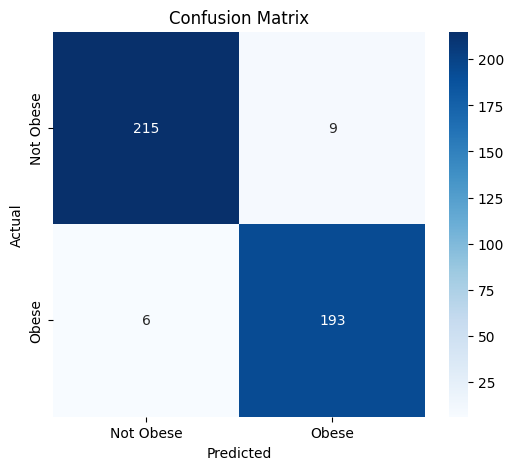

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Obese', 'Obese'], yticklabels=['Not Obese', 'Obese'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()